In [1]:
# Setup
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

sys.path.insert(0, '..')
plt.rcParams['figure.figsize'] = [10, 8]

from graph import Graph
from walkers import RandomWalker, GreedyUnbiasedWalker, DegreeBiasedWalker
from simulator import Simulator

Conjecture for performance of expected degree distribution: The closer the score is to expected degree, the better the performance.


Let $d_i$ be the degree distubution, $p_i$ be its corresponding probabilty distribution, $n$ be the number of degrees, and $d_{exp}$ be the expected degree.

Performance score: $\LARGE \sum (\frac{d_i^2p_i}{d_{exp}})$ with tiebreaker: higher $(d_{max}-d_{min})$ is better, if tie again higher $d_{min}$ is better.


In [2]:
def score(d_dist, exp_d):
    score = 0
    for key in d_dist:
        score += key*(key*d_dist[key]/exp_d)
    dmax = max(d_dist.keys())
    dmin = min(d_dist.keys())
    d_diff = dmax-dmin
    return round(score, 5), d_diff, dmax, dmin

In [3]:
def intersection(dist1, dist2, n, steps, walker_class, k):
    summary = []
    count = 0
    sign = 0
    ed1 = Simulator.simulate_w_on_ed_visited_prop(n, dist1, steps, walker_class, None, True, k)
    ed2 = Simulator.simulate_w_on_ed_visited_prop(n, dist2, steps, walker_class, None, True, k)
    diff = np.round(ed1-ed2, 2)
    for i in range(steps):
        if diff[i] < 0 and sign == 0:
            count += 1
            sign = 1
            summary.append([count, i+1, ed1[i], ed2[i], diff[i]])
        elif diff[i] > 0 and sign == 1:
            count += 1
            sign = 0
            summary.append([count, i+1, ed1[i], ed2[i], diff[i]])
    return summary, count

In [4]:
def intersectionSummary(dists, n, steps, walker_class, k):
    pairs = list(itertools.combinations(dists, 2))
    for i in range(len(pairs)):
        labels = ['intersection count', 'step', str(pairs[i][0])+' visited prop.', str(pairs[i][1])+' visited prop.', 'diff']
        df = pd.DataFrame(intersection(pairs[i][0], pairs[i][1], n, steps, walker_class, k)[0], columns=labels)
        display(df)

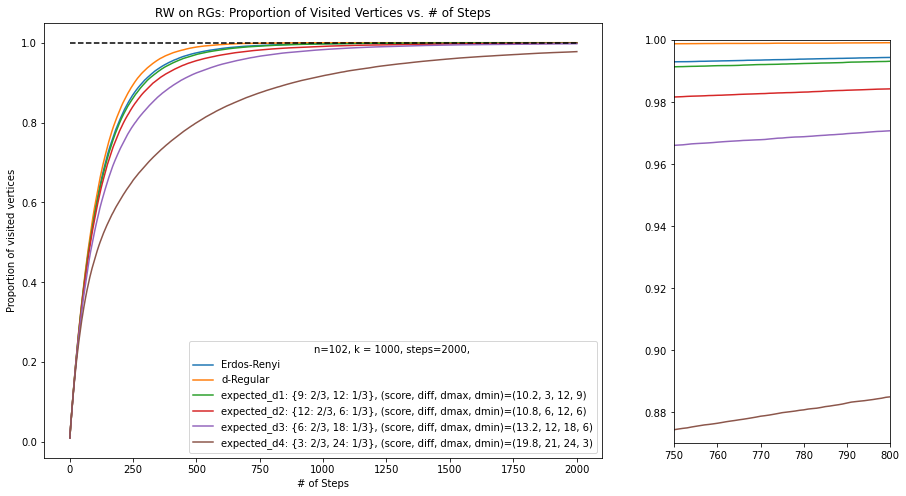

In [3]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 1000
d_p1, d_p2, d_p3, d_p4 = {9: 2/3, 12:1/3}, {12: 2/3, 6: 1/3}, {6: 2/3, 18: 1/3}, {3: 2/3, 24: 1/3}
dp = [d_p1, d_p2, d_p3, d_p4]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{9: 2/3, 12: 1/3}', '{12: 2/3, 6: 1/3}', '{6: 2/3, 18: 1/3}', '{3: 2/3, 24: 1/3}' ]
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(750, 800)
plt.ylim(0.87, 1)

plt.show()

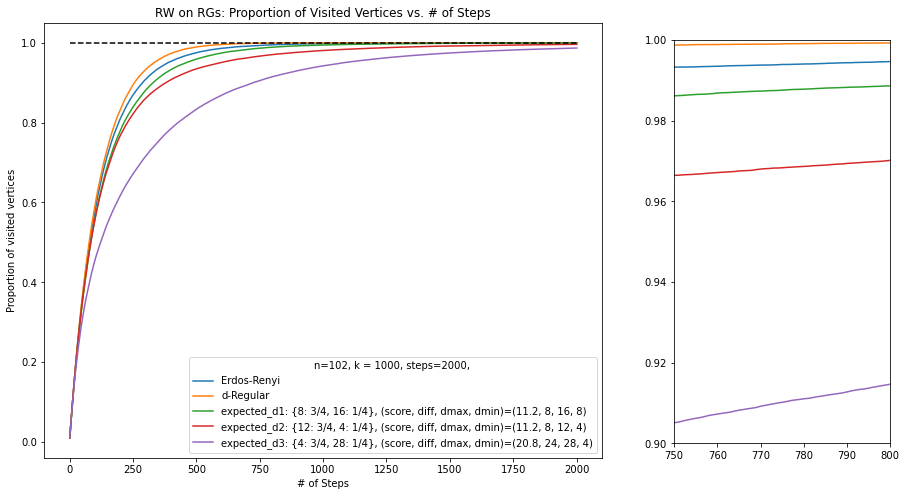

In [4]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 1000
d_p1, d_p2, d_p3 = {8: 3/4, 16: 1/4}, {12: 3/4, 4: 1/4}, {4: 3/4, 28: 1/4}
dp = [d_p1, d_p2, d_p3]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{8: 3/4, 16: 1/4}', '{12: 3/4, 4: 1/4}', '{4: 3/4, 28: 1/4}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(750, 800)
plt.ylim(0.9, 1)

plt.show()

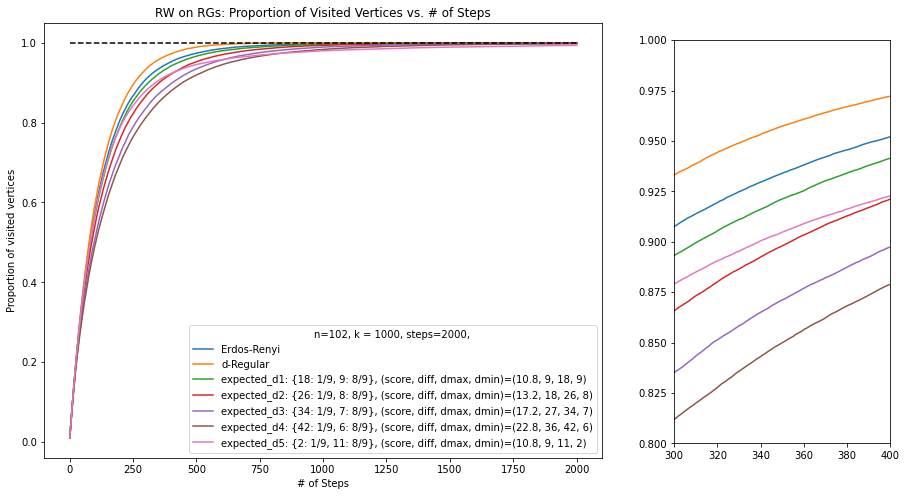

In [5]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 1000
d_p1, d_p2, d_p3 = {18: 1/9, 9: 8/9}, {26: 1/9, 8: 8/9}, {34: 1/9, 7: 8/9}
d_p4, d_p5 = {42: 1/9, 6: 8/9}, {2: 1/9, 11: 8/9}
dp = [d_p1, d_p2, d_p3, d_p4, d_p5]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{18: 1/9, 9: 8/9}', '{26: 1/9, 8: 8/9}', '{34: 1/9, 7: 8/9}','{42: 1/9, 6: 8/9}','{2: 1/9, 11: 8/9}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(300, 400)
plt.ylim(0.8, 1)

plt.show()

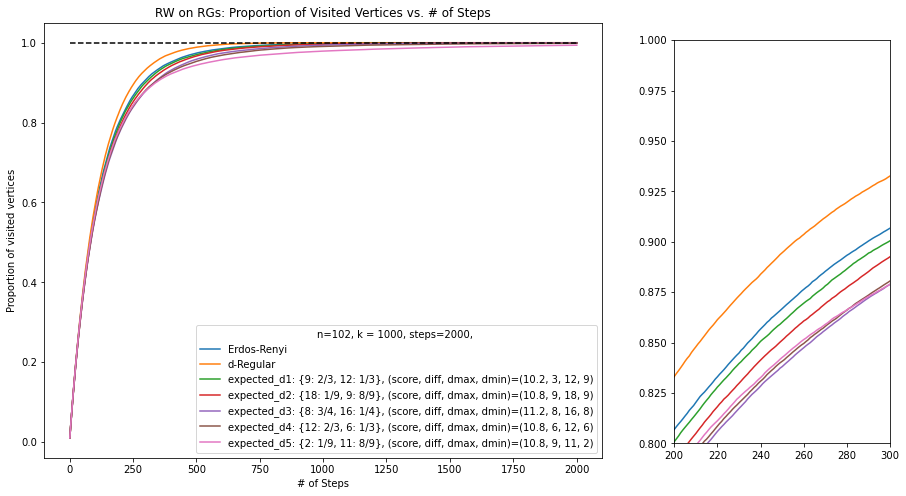

In [6]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 1000
d_p1, d_p2, d_p3, d_p4, d_p5 = {9: 2/3, 12: 1/3}, {18: 1/9, 9: 8/9}, {8: 3/4, 16: 1/4}, {12: 2/3, 6: 1/3}, {2: 1/9, 11: 8/9}
dp = [d_p1, d_p2, d_p3, d_p4, d_p5]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{9: 2/3, 12: 1/3}', '{18: 1/9, 9: 8/9}', '{8: 3/4, 16: 1/4}','{12: 2/3, 6: 1/3}','{2: 1/9, 11: 8/9}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(200, 300)
plt.ylim(0.8, 1)

plt.show()

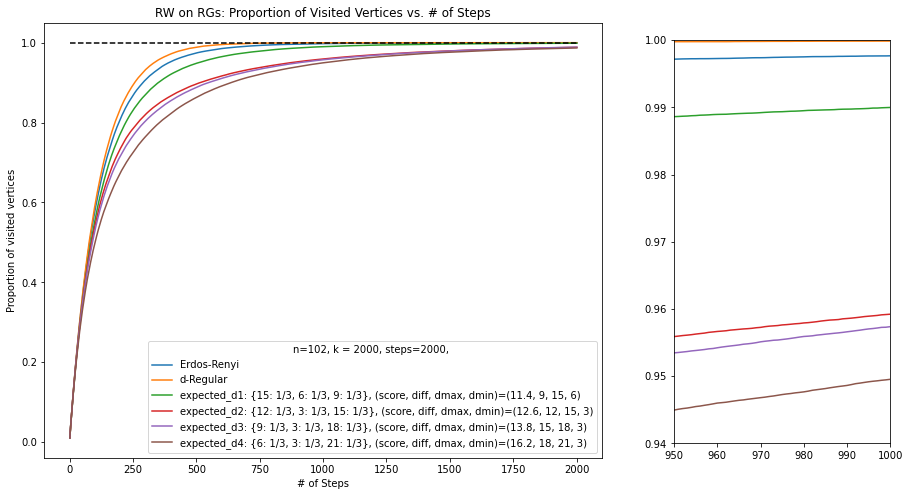

In [7]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 2000
d_p1, d_p2, d_p3, d_p4 = {15: 1/3, 6: 1/3, 9: 1/3}, {12: 1/3, 3: 1/3, 15: 1/3}, {9: 1/3, 3: 1/3, 18: 1/3}, {6: 1/3, 3: 1/3, 21: 1/3}
dp = [d_p1, d_p2, d_p3, d_p4]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{15: 1/3, 6: 1/3, 9: 1/3}', '{12: 1/3, 3: 1/3, 15: 1/3}', '{9: 1/3, 3: 1/3, 18: 1/3}','{6: 1/3, 3: 1/3, 21: 1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(950, 1000)
plt.ylim(0.94, 1)

plt.show()

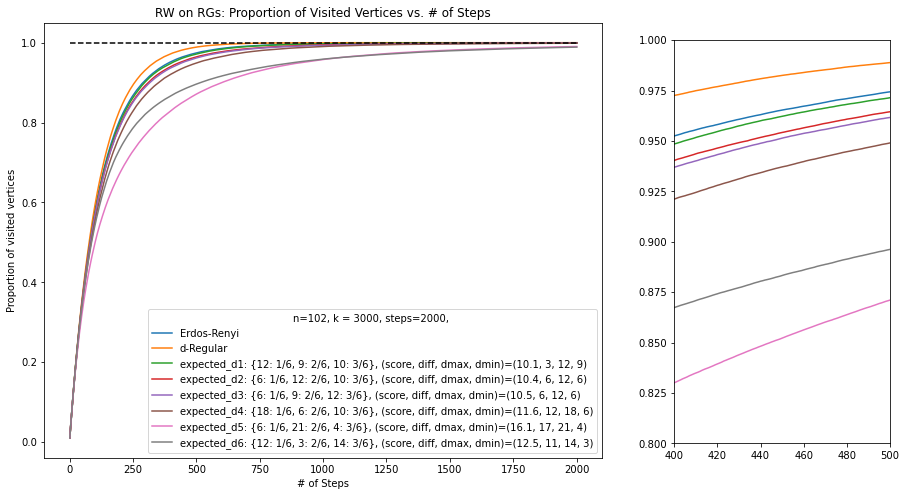

In [8]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 3000
d_p1, d_p2, d_p3 = {12: 1/6, 9: 2/6, 10: 3/6}, {6: 1/6, 12: 2/6, 10: 3/6}, {6: 1/6, 9: 2/6, 12: 3/6}, 
d_p4, d_p5, d_p6 = {18: 1/6, 6: 2/6, 10: 3/6}, {6: 1/6, 21: 2/6, 4: 3/6}, {12: 1/6, 3: 2/6, 14: 3/6},
dp = [d_p1, d_p2, d_p3, d_p4, d_p5, d_p6]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{12: 1/6, 9: 2/6, 10: 3/6}', '{6: 1/6, 12: 2/6, 10: 3/6}', '{6: 1/6, 9: 2/6, 12: 3/6}','{18: 1/6, 6: 2/6, 10: 3/6}', '{6: 1/6, 21: 2/6, 4: 3/6}', '{12: 1/6, 3: 2/6, 14: 3/6}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(400, 500)
plt.ylim(0.8, 1)

plt.show()

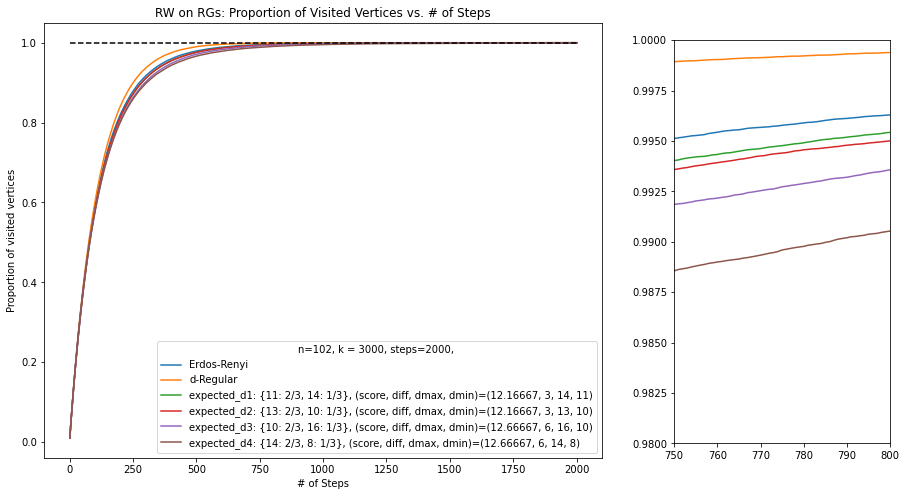

In [9]:
n, d, steps, walker_class, k = 102, 12, 2000, RandomWalker, 3000
d_p1, d_p2, d_p3, d_p4 = {11: 2/3, 14: 1/3}, {13: 2/3, 10: 1/3}, {10: 2/3, 16: 1/3}, {14: 2/3, 8: 1/3}
dp = [d_p1, d_p2, d_p3, d_p4]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{11: 2/3, 14: 1/3}', '{13: 2/3, 10: 1/3}', '{10: 2/3, 16: 1/3}','{14: 2/3, 8: 1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(750, 800)
plt.ylim(0.98, 1)

plt.show()

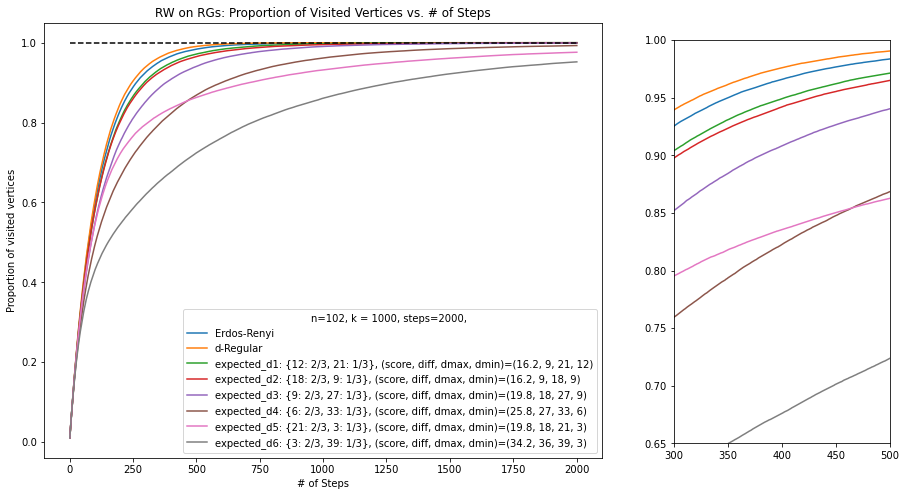

In [18]:
n, d, steps, walker_class, k = 102, 15, 2000, RandomWalker, 1000
d_p1, d_p2, d_p3, d_p4 = {12:2/3, 21:1/3}, {18:2/3, 9:1/3}, {9:2/3, 27:1/3}, {6:2/3, 33:1/3}
d_p5, d_p6 = {21:2/3, 3:1/3}, {3:2/3, 39:1/3}
dp = [d_p1, d_p2, d_p3, d_p4, d_p5, d_p6]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{12: 2/3, 21: 1/3}', '{18: 2/3, 9: 1/3}', '{9: 2/3, 27: 1/3}','{6: 2/3, 33: 1/3}', '{21: 2/3, 3: 1/3}', '{3: 2/3, 39: 1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(300, 500)
plt.ylim(0.65, 1)

plt.show()

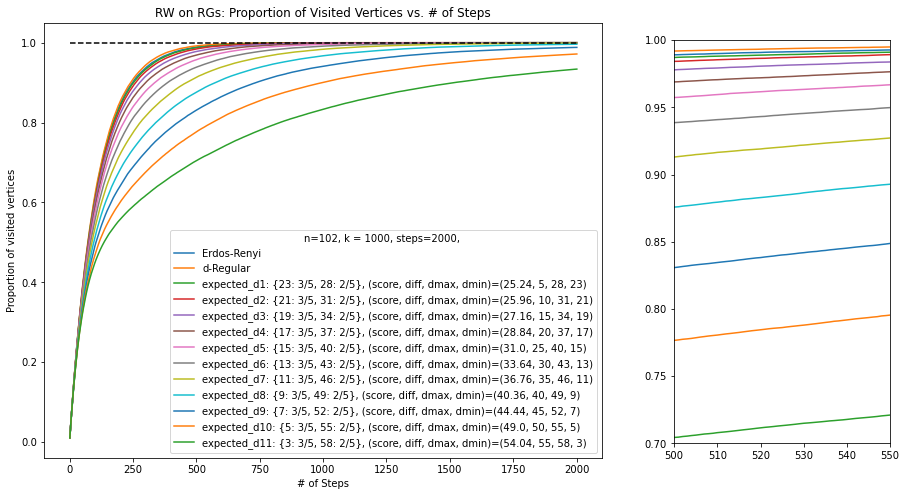

In [11]:
n, d, steps, walker_class, k = 102, 25, 2000, RandomWalker, 1000

dp = []
l = []
d1 = 23
d2 = 28
while d1 != 1:
    dp.append({d1: 3/5, d2: 2/5})
    l.append('{'+str(d1)+': 3/5, '+str(d2)+': 2/5}')
    d1 -= 2
    d2 += 3
    
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')

for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(500, 550)
plt.ylim(0.7, 1)

plt.show()

# 4/12

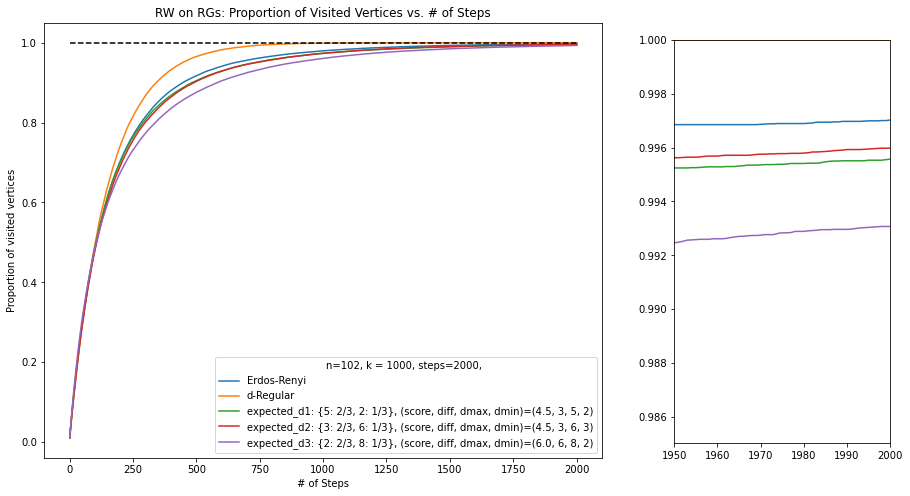

In [12]:
n, d, steps, walker_class, k = 102, 4, 2000, RandomWalker, 1000
d_p1, d_p2, d_p3 = {5: 2/3, 2: 1/3}, {3: 2/3, 6: 1/3}, {2: 2/3, 8: 1/3}
dp = [d_p1, d_p2, d_p3]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{5: 2/3, 2: 1/3}', '{3: 2/3, 6: 1/3}', '{2: 2/3, 8: 1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(1950, 2000)
plt.ylim(0.985, 1)

plt.show()

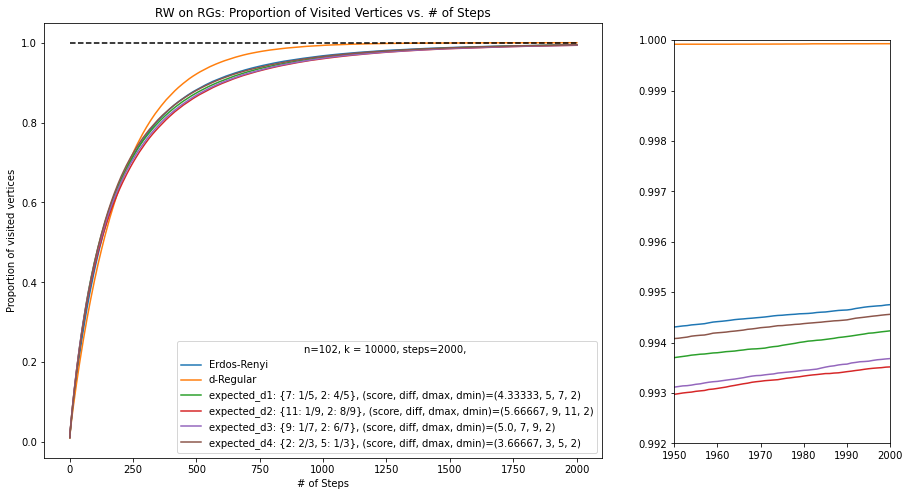

In [13]:
# increased sample to 10000 for stability
n, d, steps, walker_class, k = 102, 3, 2000, RandomWalker, 10000
d_p1, d_p2, d_p3, d_p4 = {7: 1/5, 2: 4/5}, {11: 1/9, 2: 8/9}, {9: 1/7, 2: 6/7}, {2: 2/3, 5: 1/3}
dp = [d_p1, d_p2, d_p3, d_p4]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{7: 1/5, 2: 4/5}', '{11: 1/9, 2: 8/9}', '{9: 1/7, 2: 6/7}', '{2: 2/3, 5: 1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(1950, 2000)
plt.ylim(0.992, 1)

plt.show()

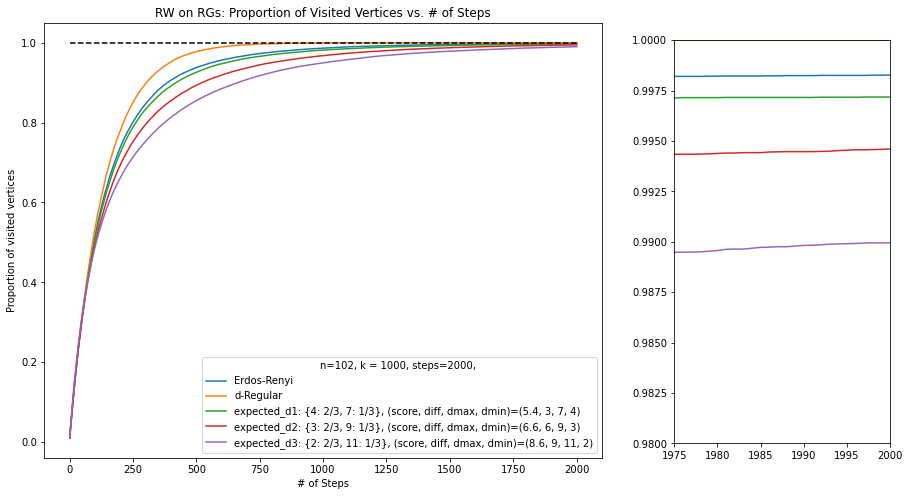

In [14]:
n, d, steps, walker_class, k = 102, 5, 2000, RandomWalker, 1000
d_p1, d_p2, d_p3 = {4: 2/3, 7: 1/3}, {3: 2/3, 9: 1/3}, {2: 2/3, 11: 1/3}
dp = [d_p1, d_p2, d_p3]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{4: 2/3, 7: 1/3}', '{3: 2/3, 9: 1/3}', '{2: 2/3, 11: 1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(1975, 2000)
plt.ylim(0.98, 1)

plt.show()

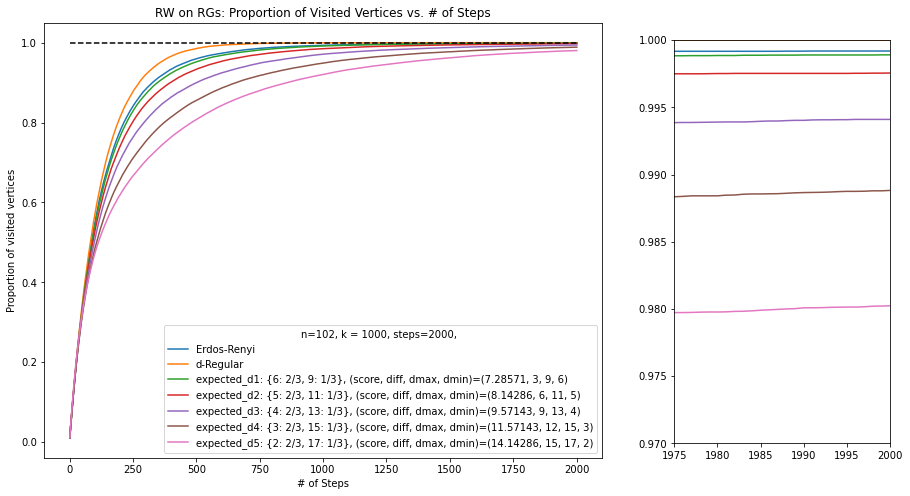

In [15]:
n, d, steps, walker_class, k = 102, 7, 2000, RandomWalker, 1000
d_p1, d_p2, d_p3, d_p4, d_p5 = {6: 2/3, 9: 1/3}, {5: 2/3, 11: 1/3}, {4: 2/3, 13: 1/3}, {3: 2/3, 15: 1/3}, {2: 2/3, 17: 1/3}
dp = [d_p1, d_p2, d_p3, d_p4, d_p5]
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, True, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, True, k)
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
l = ['{6: 2/3, 9: 1/3}', '{5: 2/3, 11: 1/3}', '{4: 2/3, 13: 1/3}', '{3: 2/3, 15: 1/3}', '{2: 2/3, 17: 1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
plt.plot(t, er)
plt.plot(t, k_reg)
for i in ed:
    plt.plot(t, i)
plt.xlim(1975, 2000)
plt.ylim(0.97, 1)

plt.show()

# 4/15

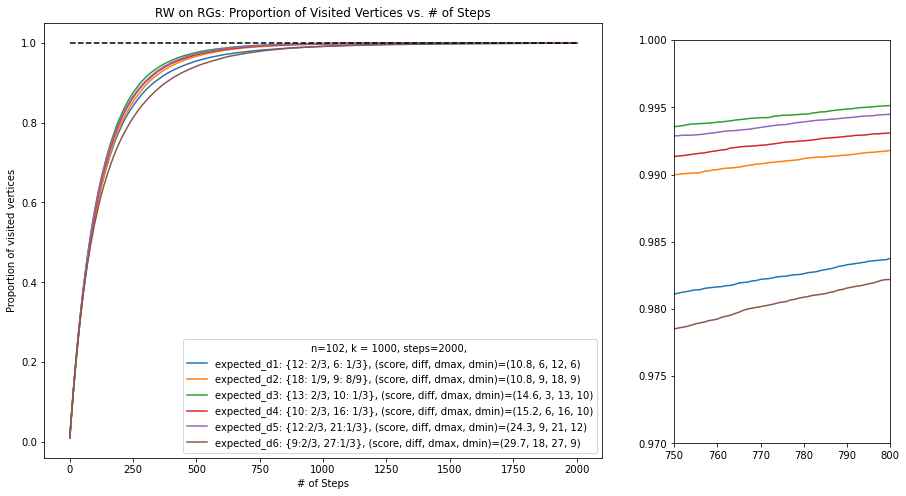

In [16]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 1000
d_p1_10, d_p2_10 = {12: 2/3, 6: 1/3}, {18: 1/9, 9: 8/9}
d_p1_12, d_p2_12 = {13: 2/3, 10: 1/3}, {10: 2/3, 16: 1/3}
d_p1_15, d_p2_15 = {12:2/3, 21:1/3}, {9:2/3, 27:1/3}
dp = [d_p1_10, d_p2_10, d_p1_12, d_p2_12, d_p1_15, d_p2_15]
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(ed[0])+1, step=1)
l = ['{12: 2/3, 6: 1/3}', '{18: 1/9, 9: 8/9}', '{13: 2/3, 10: 1/3}', '{10: 2/3, 16: 1/3}', '{12:2/3, 21:1/3}', '{9:2/3, 27:1/3}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
for i in ed:
    plt.plot(t, i)
plt.xlim(750, 800)
plt.ylim(0.97, 1)

plt.show()

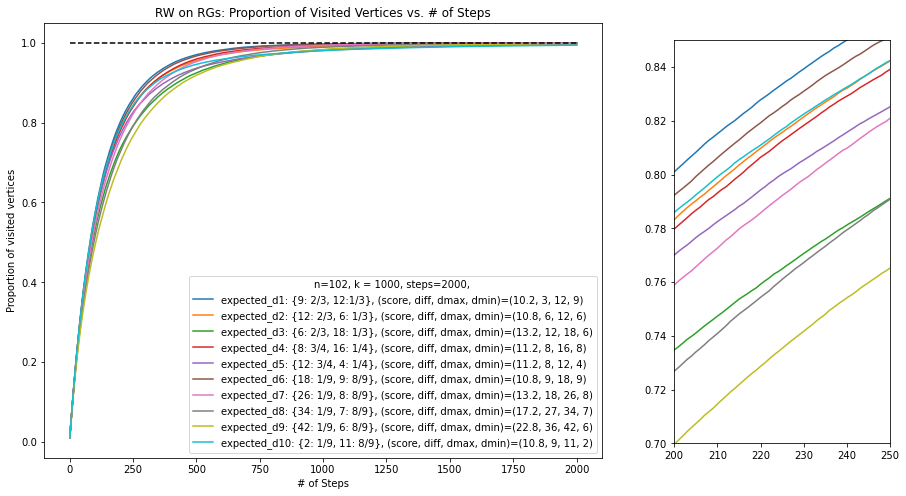

In [17]:
n, d, steps, walker_class, k = 102, 10, 2000, RandomWalker, 1000
dp = [{9: 2/3, 12:1/3}, {12: 2/3, 6: 1/3}, {6: 2/3, 18: 1/3},
      {8: 3/4, 16: 1/4}, {12: 3/4, 4: 1/4}, {18: 1/9, 9: 8/9},
      {26: 1/9, 8: 8/9}, {34: 1/9, 7: 8/9}, {42: 1/9, 6: 8/9}, {2: 1/9, 11: 8/9}]
ed = []
for i in dp:
    ed.append(Simulator.simulate_w_on_ed_visited_prop(n, i, steps, walker_class, None, True, k))

t = np.arange(1, len(ed[0])+1, step=1)
l = ['{9: 2/3, 12:1/3}', '{12: 2/3, 6: 1/3}', '{6: 2/3, 18: 1/3}',
      '{8: 3/4, 16: 1/4}', '{12: 3/4, 4: 1/4}', '{18: 1/9, 9: 8/9}',
      '{26: 1/9, 8: 8/9}', '{34: 1/9, 7: 8/9}', '{42: 1/9, 6: 8/9}', '{2: 1/9, 11: 8/9}']
for i in range(len(ed)):
    plt.plot(t, ed[i], label='expected_d'+str(i+1)+': '+l[i]+', (score, diff, dmax, dmin)='+str(score(dp[i], d)))

plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')

a = plt.axes([1, 0.15, .3, .7])
for i in ed:
    plt.plot(t, i)
plt.xlim(200, 250)
plt.ylim(0.7, 0.85)

plt.show()

# 4/18

Performance score: $\LARGE \sum (\frac{d_i^2p_i}{d_{exp}})$ with tiebreaker: higher $(d_{max}-d_{min})$ is better, if tie again higher $d_{min}$ is better.

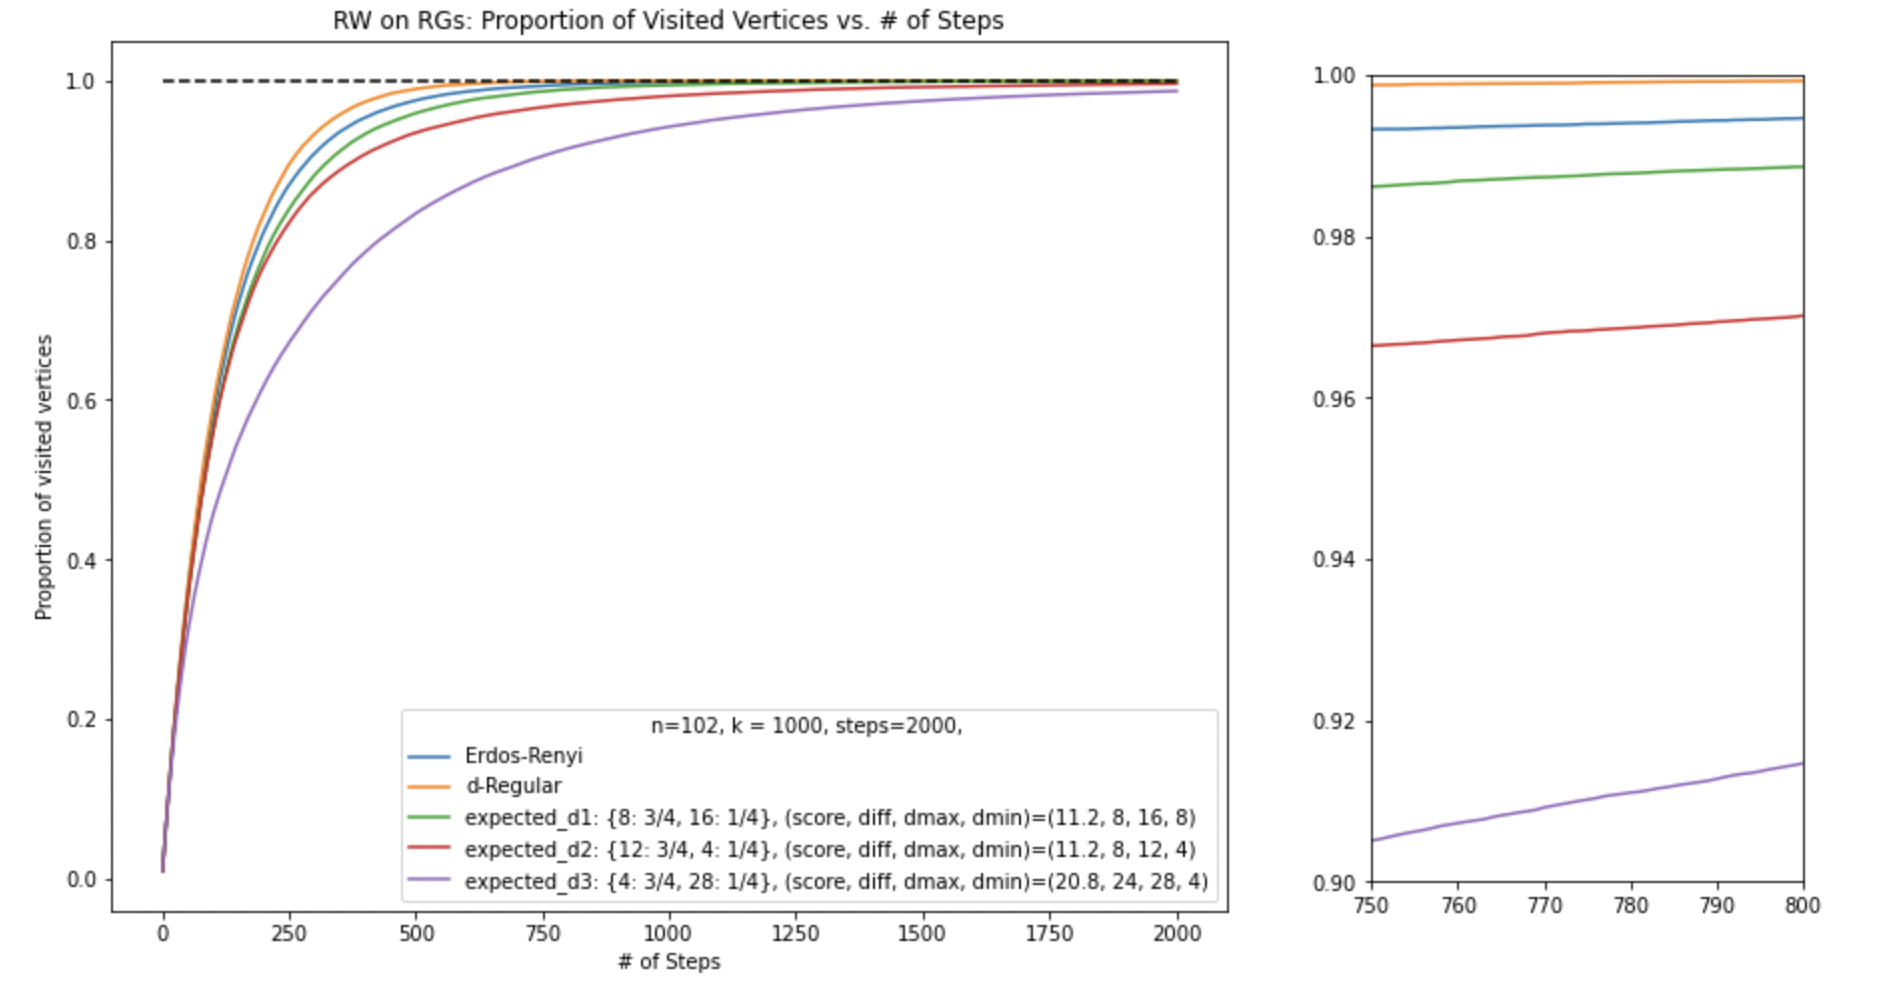
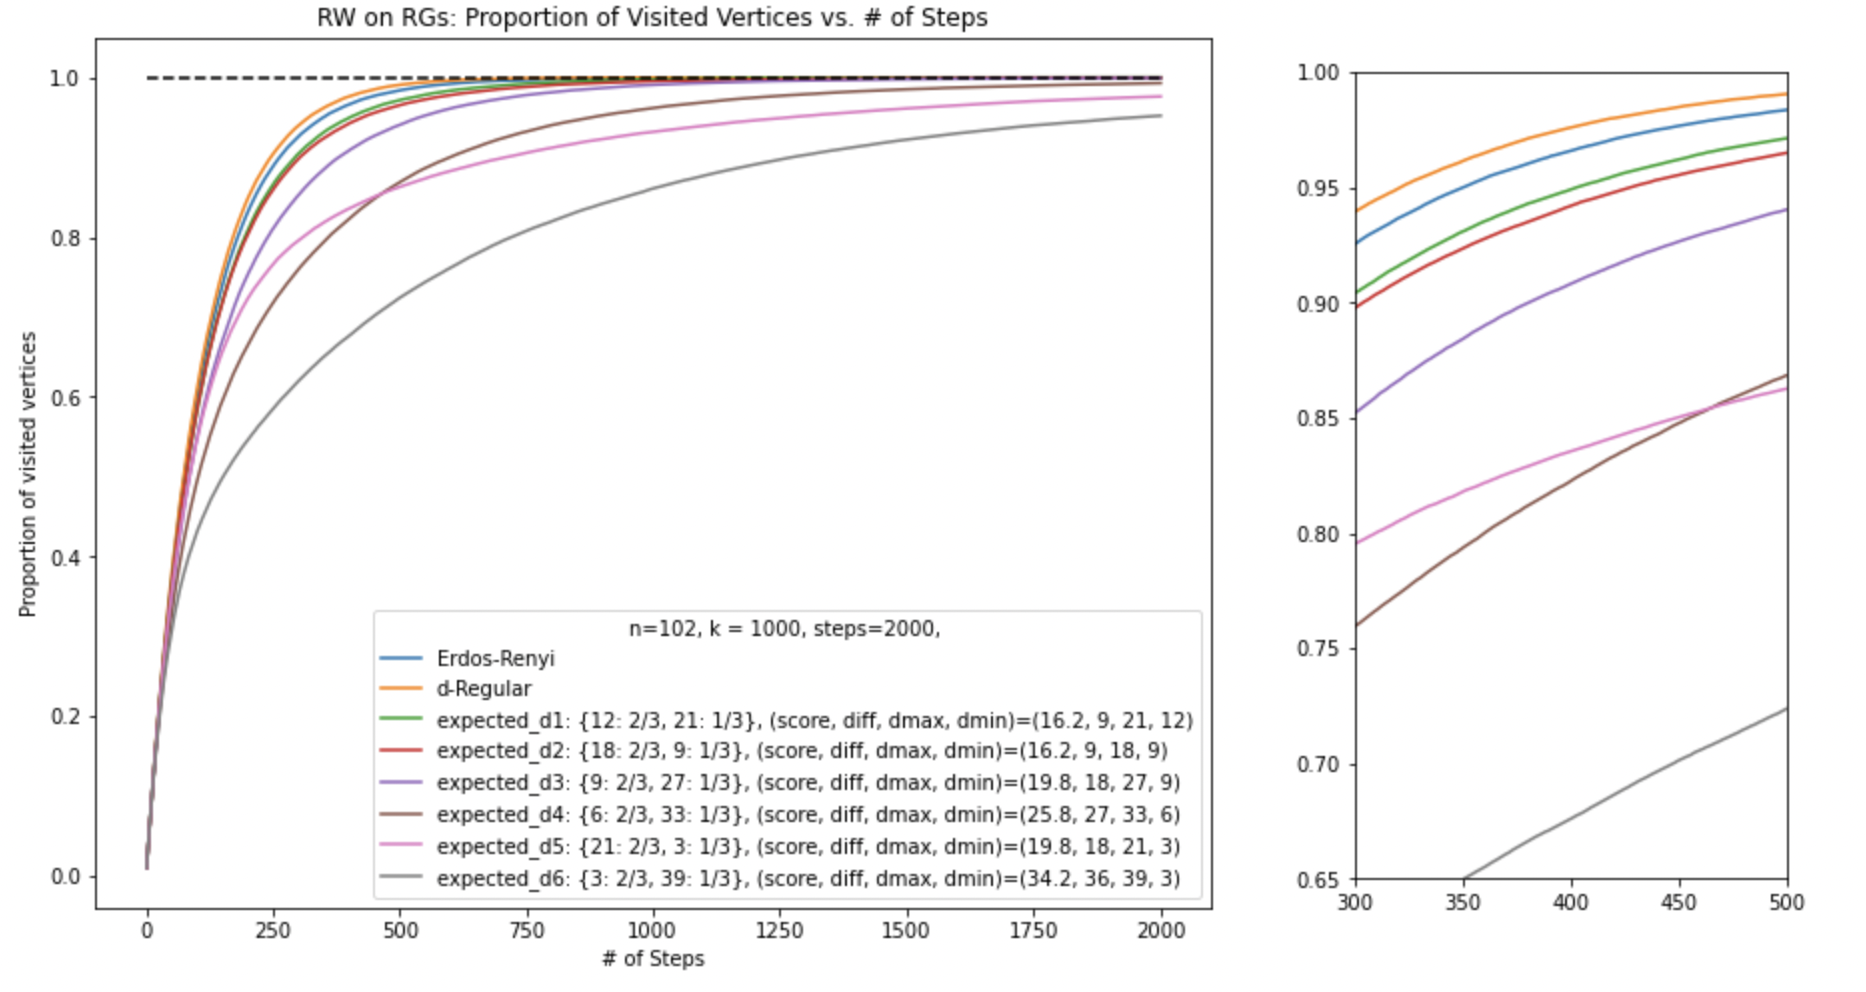

# 4/22

In [5]:
n, steps, walker_class, k = 102, 2000, RandomWalker, 10000

### Expected degree = 3:
1. {7: 1/5, 2: 4/5}, {11: 1/9, 2: 8/9}, {9: 1/7, 2: 6/7}, {2: 2/3, 5: 1/3}

    #### Intersections:

In [38]:
dists = [{7: 1/5, 2: 4/5}, {11: 1/9, 2: 8/9}, {9: 1/7, 2: 6/7}, {2: 2/3, 5: 1/3}]
intersectionSummary(dists, n, steps, walker_class, k)

Empty DataFrame
Columns: [intersection count, step, {7: 0.2, 2: 0.8} visited prop., {11: 0.1111111111111111, 2: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {7: 0.2, 2: 0.8} visited prop., {9: 0.14285714285714285, 2: 0.8571428571428571} visited prop., diff]
Index: []

intersection count  step  {7: 0.2, 2: 0.8} visited prop.  \
0                   1   158                        0.585048   

   {2: 0.6666666666666666, 5: 0.3333333333333333} visited prop.  diff  
0                                           0.590077            -0.01

intersection count  step  \
0                   1    66   

   {11: 0.1111111111111111, 2: 0.8888888888888888} visited prop.  \
0                                           0.341612               

   {9: 0.14285714285714285, 2: 0.8571428571428571} visited prop.  diff  
0                                           0.346617             -0.01

intersection count  step  \
0                   1    77   

   {11: 0.1111111111111111, 2: 0.8888888888888888} visited prop.  \
0                                           0.377978               

   {2: 0.6666666666666666, 5: 0.3333333333333333} visited prop.  diff  
0                                           0.382996            -0.01

intersection count  step  \
0                   1   110   

   {9: 0.14285714285714285, 2: 0.8571428571428571} visited prop.  \
0                                           0.477335               

   {2: 0.6666666666666666, 5: 0.3333333333333333} visited prop.  diff  
0                                           0.482393            -0.01

Formula agrees after about 60% coverage:
- {2: 2/3, 5: 1/3} > {7: 1/5, 2: 4/5}, {11: 1/9, 2: 8/9}, {9: 1/7, 2: 6/7}
- {9: 1/7, 2: 6/7} > {11: 1/9, 2: 8/9}

In [39]:
dists = [{7: 1/5, 2: 4/5}, {11: 1/9, 2: 8/9}, {9: 1/7, 2: 6/7}, {2: 2/3, 5: 1/3}]
for i in dists:
    print(str(i)+': '+str(score(i, 3)))

{7: 0.2, 2: 0.8}: (4.33333, 5, 7, 2)
{11: 0.1111111111111111, 2: 0.8888888888888888}: (5.66667, 9, 11, 2)
{9: 0.14285714285714285, 2: 0.8571428571428571}: (5.0, 7, 9, 2)
{2: 0.6666666666666666, 5: 0.3333333333333333}: (3.66667, 3, 5, 2)


### Expected degree = 4:
1. {5: 2/3, 2: 1/3}, {3: 2/3, 6: 1/3}, {2: 2/3, 8: 1/3}

    #### Intersections:

In [40]:
dists = [{5: 2/3, 2: 1/3}, {3: 2/3, 6: 1/3}, {2: 2/3, 8: 1/3}]
intersectionSummary(dists, n, steps, walker_class, k)

Empty DataFrame
Columns: [intersection count, step, {5: 0.6666666666666666, 2: 0.3333333333333333} visited prop., {3: 0.6666666666666666, 6: 0.3333333333333333} visited prop., diff]
Index: []

intersection count  step  \
0                   1    11   
1                   2    99   

   {5: 0.6666666666666666, 2: 0.3333333333333333} visited prop.  \
0                                           0.084456              
1                                           0.486033              

   {2: 0.6666666666666666, 8: 0.3333333333333333} visited prop.  diff  
0                                           0.089489            -0.01  
1                                           0.480773             0.01

intersection count  step  \
0                   1     8   
1                   2   137   

   {3: 0.6666666666666666, 6: 0.3333333333333333} visited prop.  \
0                                           0.062788              
1                                           0.576092              

   {2: 0.6666666666666666, 8: 0.3333333333333333} visited prop.  diff  
0                                           0.068139            -0.01  
1                                           0.571087             0.01

Formula agrees after 60% coverage:
- {5: 2/3, 2: 1/3} > {3: 2/3, 6: 1/3}
- {3: 2/3, 6: 1/3} > {2: 2/3, 8: 1/3}

In [13]:
dists = [{5: 2/3, 2: 1/3}, {3: 2/3, 6: 1/3}, {2: 2/3, 8: 1/3}]
for i in dists:
    print(str(i)+': '+str(score(i, 4)))

{5: 0.6666666666666666, 2: 0.3333333333333333}: (4.5, 3, 5, 2)
{3: 0.6666666666666666, 6: 0.3333333333333333}: (4.5, 3, 6, 3)
{2: 0.6666666666666666, 8: 0.3333333333333333}: (6.0, 6, 8, 2)


### Expected degree = 5:
1. {4: 2/3, 7: 1/3}, {3: 2/3, 9: 1/3}, {2: 2/3, 11: 1/3}

    #### Intersections:

In [41]:
dists = [{4: 2/3, 7: 1/3}, {3: 2/3, 9: 1/3}, {2: 2/3, 11: 1/3}]
intersectionSummary(dists, n, steps, walker_class, k)

Empty DataFrame
Columns: [intersection count, step, {4: 0.6666666666666666, 7: 0.3333333333333333} visited prop., {3: 0.6666666666666666, 9: 0.3333333333333333} visited prop., diff]
Index: []

intersection count  step  \
0                   1     7   
1                   2    77   

   {4: 0.6666666666666666, 7: 0.3333333333333333} visited prop.  \
0                                           0.057357              
1                                           0.425790              

   {2: 0.6666666666666666, 11: 0.3333333333333333} visited prop.  diff  
0                                           0.062971             -0.01  
1                                           0.420450              0.01

intersection count  step  \
0                   1     9   
1                   2    94   

   {3: 0.6666666666666666, 9: 0.3333333333333333} visited prop.  \
0                                           0.073152              
1                                           0.475540              

   {2: 0.6666666666666666, 11: 0.3333333333333333} visited prop.  diff  
0                                           0.078230             -0.01  
1                                           0.470251              0.01

Formula agrees after 50% coverage:
- {4: 2/3, 7: 1/3} > {2: 2/3, 11: 1/3}
- {3: 2/3, 9: 1/3} > {2: 2/3, 11: 1/3}

In [6]:
dists = [{4: 2/3, 7: 1/3}, {3: 2/3, 9: 1/3}, {2: 2/3, 11: 1/3}]
for i in dists:
    print(str(i)+': '+str(score(i, 5)))

{4: 0.6666666666666666, 7: 0.3333333333333333}: (5.4, 3, 7, 4)
{3: 0.6666666666666666, 9: 0.3333333333333333}: (6.6, 6, 9, 3)
{2: 0.6666666666666666, 11: 0.3333333333333333}: (8.6, 9, 11, 2)


### Expected degree = 7:
1. {6: 2/3, 9: 1/3}, {5: 2/3, 11: 1/3}, {4: 2/3, 13: 1/3}, {3: 2/3, 15: 1/3}, {2: 2/3, 17: 1/3}

    #### Intersections:

In [42]:
dists = [{6: 2/3, 9: 1/3}, {5: 2/3, 11: 1/3}, {4: 2/3, 13: 1/3}, {3: 2/3, 15: 1/3}, {2: 2/3, 17: 1/3}]
intersectionSummary(dists, n, steps, walker_class, k)

Empty DataFrame
Columns: [intersection count, step, {6: 0.6666666666666666, 9: 0.3333333333333333} visited prop., {5: 0.6666666666666666, 11: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {6: 0.6666666666666666, 9: 0.3333333333333333} visited prop., {4: 0.6666666666666666, 13: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {6: 0.6666666666666666, 9: 0.3333333333333333} visited prop., {3: 0.6666666666666666, 15: 0.3333333333333333} visited prop., diff]
Index: []

intersection count  step  \
0                   1     6   
1                   2    43   

   {6: 0.6666666666666666, 9: 0.3333333333333333} visited prop.  \
0                                           0.052051              
1                                           0.296699              

   {2: 0.6666666666666666, 17: 0.3333333333333333} visited prop.  diff  
0                                           0.057104             -0.01  
1                                           0.290930              0.01

Empty DataFrame
Columns: [intersection count, step, {5: 0.6666666666666666, 11: 0.3333333333333333} visited prop., {4: 0.6666666666666666, 13: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {5: 0.6666666666666666, 11: 0.3333333333333333} visited prop., {3: 0.6666666666666666, 15: 0.3333333333333333} visited prop., diff]
Index: []

intersection count  step  \
0                   1     7   
1                   2    48   

   {5: 0.6666666666666666, 11: 0.3333333333333333} visited prop.  \
0                                           0.060038               
1                                           0.319066               

   {2: 0.6666666666666666, 17: 0.3333333333333333} visited prop.  diff  
0                                           0.065285             -0.01  
1                                           0.313547              0.01

Empty DataFrame
Columns: [intersection count, step, {4: 0.6666666666666666, 13: 0.3333333333333333} visited prop., {3: 0.6666666666666666, 15: 0.3333333333333333} visited prop., diff]
Index: []

intersection count  step  \
0                   1     7   
1                   2    58   

   {4: 0.6666666666666666, 13: 0.3333333333333333} visited prop.  \
0                                           0.060190               
1                                           0.359253               

   {2: 0.6666666666666666, 17: 0.3333333333333333} visited prop.  diff  
0                                           0.065480             -0.01  
1                                           0.353646              0.01

intersection count  step  \
0                   1     9   
1                   2    77   

   {3: 0.6666666666666666, 15: 0.3333333333333333} visited prop.  \
0                                           0.076819               
1                                           0.419828               

   {2: 0.6666666666666666, 17: 0.3333333333333333} visited prop.  diff  
0                                           0.081984             -0.01  
1                                           0.414576              0.01

Agrees after 40%:
- {6: 2/3, 9: 1/3} > {2: 2/3, 17: 1/3}
- {5: 2/3, 11: 1/3} > {2: 2/3, 17: 1/3}
- {4: 2/3, 13: 1/3} > {2: 2/3, 17: 1/3}
- {3: 2/3, 15: 1/3} > {2: 2/3, 17: 1/3}

In [7]:
dists = [{6: 2/3, 9: 1/3}, {5: 2/3, 11: 1/3}, {4: 2/3, 13: 1/3}, {3: 2/3, 15: 1/3}, {2: 2/3, 17: 1/3}]
for i in dists:
    print(str(i)+': '+str(score(i, 7)))

{6: 0.6666666666666666, 9: 0.3333333333333333}: (7.28571, 3, 9, 6)
{5: 0.6666666666666666, 11: 0.3333333333333333}: (8.14286, 6, 11, 5)
{4: 0.6666666666666666, 13: 0.3333333333333333}: (9.57143, 9, 13, 4)
{3: 0.6666666666666666, 15: 0.3333333333333333}: (11.57143, 12, 15, 3)
{2: 0.6666666666666666, 17: 0.3333333333333333}: (14.14286, 15, 17, 2)


### Expected degree = 10:
1. {9: 2/3, 12:1/3}, {12: 2/3, 6: 1/3}, {6: 2/3, 18: 1/3}, {3: 2/3, 24: 1/3}
2. {8: 3/4, 16: 1/4}, {12: 3/4, 4: 1/4}, {4: 3/4, 28: 1/4}
3. {18: 1/9, 9: 8/9}, {26: 1/9, 8: 8/9}, {34: 1/9, 7: 8/9}, {42: 1/9, 6: 8/9}, {2: 1/9, 11: 8/9}
4. {15: 1/3, 6: 1/3, 9: 1/3}, {12: 1/3, 3: 1/3, 15: 1/3}, {9: 1/3, 3: 1/3, 18: 1/3}, {6: 1/3, 3: 1/3, 21: 1/3}
5. {12: 1/6, 9: 2/6, 10: 3/6}, {6: 1/6, 12: 2/6, 10: 3/6}, {6: 1/6, 9: 2/6, 12: 3/6}, {18: 1/6, 6: 2/6, 10: 3/6}, {6: 1/6, 21: 2/6, 4: 3/6}, {12: 1/6, 3: 2/6, 14: 3/6}

    #### Intersections:

In [8]:
dists = [{9: 2/3, 12:1/3}, {12: 2/3, 6: 1/3}, {6: 2/3, 18: 1/3}, {3: 2/3, 24: 1/3}, 
         {8: 3/4, 16: 1/4}, {12: 3/4, 4: 1/4}, {4: 3/4, 28: 1/4}, 
         {18: 1/9, 9: 8/9}, {26: 1/9, 8: 8/9}, {34: 1/9, 7: 8/9}, {42: 1/9, 6: 8/9}, {2: 1/9, 11: 8/9}]
intersectionSummary(dists, n, steps, walker_class, k)

Empty DataFrame
Columns: [intersection count, step, {9: 0.6666666666666666, 12: 0.3333333333333333} visited prop., {12: 0.6666666666666666, 6: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {9: 0.6666666666666666, 12: 0.3333333333333333} visited prop., {6: 0.6666666666666666, 18: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {9: 0.6666666666666666, 12: 0.3333333333333333} visited prop., {3: 0.6666666666666666, 24: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {9: 0.6666666666666666, 12: 0.3333333333333333} visited prop., {8: 0.75, 16: 0.25} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {9: 0.6666666666666666, 12: 0.3333333333333333} visited prop., {12: 0.75, 4: 0.25} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {9: 0.6666666666666666, 12: 0.3333333333333333} visited prop., {4: 0.75, 28: 0.25} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {9: 0.6666666666666666, 12: 0.3333333333333333} visited prop., {18: 0.1111111111111111, 9: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {9: 0.6666666666666666, 12: 0.3333333333333333} visited prop., {26: 0.1111111111111111, 8: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {9: 0.6666666666666666, 12: 0.3333333333333333} visited prop., {34: 0.1111111111111111, 7: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {9: 0.6666666666666666, 12: 0.3333333333333333} visited prop., {42: 0.1111111111111111, 6: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {9: 0.6666666666666666, 12: 0.3333333333333333} visited prop., {2: 0.1111111111111111, 11: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {12: 0.6666666666666666, 6: 0.3333333333333333} visited prop., {6: 0.6666666666666666, 18: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {12: 0.6666666666666666, 6: 0.3333333333333333} visited prop., {3: 0.6666666666666666, 24: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {12: 0.6666666666666666, 6: 0.3333333333333333} visited prop., {8: 0.75, 16: 0.25} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {12: 0.6666666666666666, 6: 0.3333333333333333} visited prop., {12: 0.75, 4: 0.25} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {12: 0.6666666666666666, 6: 0.3333333333333333} visited prop., {4: 0.75, 28: 0.25} visited prop., diff]
Index: []

intersection count  step  \
0                   1   133   

   {12: 0.6666666666666666, 6: 0.3333333333333333} visited prop.  \
0                                           0.657239               

   {18: 0.1111111111111111, 9: 0.8888888888888888} visited prop.  diff  
0                                           0.662251             -0.01

Empty DataFrame
Columns: [intersection count, step, {12: 0.6666666666666666, 6: 0.3333333333333333} visited prop., {26: 0.1111111111111111, 8: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {12: 0.6666666666666666, 6: 0.3333333333333333} visited prop., {34: 0.1111111111111111, 7: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {12: 0.6666666666666666, 6: 0.3333333333333333} visited prop., {42: 0.1111111111111111, 6: 0.8888888888888888} visited prop., diff]
Index: []

intersection count  step  \
0                   1    51   
1                   2   352   

   {12: 0.6666666666666666, 6: 0.3333333333333333} visited prop.  \
0                                           0.355145               
1                                           0.909845               

   {2: 0.1111111111111111, 11: 0.8888888888888888} visited prop.  diff  
0                                           0.360235             -0.01  
1                                           0.904801              0.01

Empty DataFrame
Columns: [intersection count, step, {6: 0.6666666666666666, 18: 0.3333333333333333} visited prop., {3: 0.6666666666666666, 24: 0.3333333333333333} visited prop., diff]
Index: []

intersection count  step  \
0                   1    34   

   {6: 0.6666666666666666, 18: 0.3333333333333333} visited prop.  \
0                                           0.250841               

   {8: 0.75, 16: 0.25} visited prop.  diff  
0                           0.255926 -0.01

intersection count  step  \
0                   1    30   

   {6: 0.6666666666666666, 18: 0.3333333333333333} visited prop.  \
0                                           0.226047               

   {12: 0.75, 4: 0.25} visited prop.  diff  
0                           0.231332 -0.01

Empty DataFrame
Columns: [intersection count, step, {6: 0.6666666666666666, 18: 0.3333333333333333} visited prop., {4: 0.75, 28: 0.25} visited prop., diff]
Index: []

intersection count  step  \
0                   1    31   

   {6: 0.6666666666666666, 18: 0.3333333333333333} visited prop.  \
0                                           0.232639               

   {18: 0.1111111111111111, 9: 0.8888888888888888} visited prop.  diff  
0                                           0.237798             -0.01

intersection count  step  \
0                   1    79   

   {6: 0.6666666666666666, 18: 0.3333333333333333} visited prop.  \
0                                           0.462345               

   {26: 0.1111111111111111, 8: 0.8888888888888888} visited prop.  diff  
0                                           0.467426             -0.01

intersection count  step  \
0                   1   336   

   {6: 0.6666666666666666, 18: 0.3333333333333333} visited prop.  \
0                                           0.858235               

   {34: 0.1111111111111111, 7: 0.8888888888888888} visited prop.  diff  
0                                            0.86332             -0.01

Empty DataFrame
Columns: [intersection count, step, {6: 0.6666666666666666, 18: 0.3333333333333333} visited prop., {42: 0.1111111111111111, 6: 0.8888888888888888} visited prop., diff]
Index: []

intersection count  step  \
0                   1    21   

   {6: 0.6666666666666666, 18: 0.3333333333333333} visited prop.  \
0                                           0.167531               

   {2: 0.1111111111111111, 11: 0.8888888888888888} visited prop.  diff  
0                                            0.17256             -0.01

intersection count  step  \
0                   1    24   

   {3: 0.6666666666666666, 24: 0.3333333333333333} visited prop.  \
0                                            0.18455               

   {8: 0.75, 16: 0.25} visited prop.  diff  
0                           0.190213 -0.01

intersection count  step  \
0                   1    23   

   {3: 0.6666666666666666, 24: 0.3333333333333333} visited prop.  \
0                                           0.178572               

   {12: 0.75, 4: 0.25} visited prop.  diff  
0                           0.183954 -0.01

intersection count  step  \
0                   1   178   

   {3: 0.6666666666666666, 24: 0.3333333333333333} visited prop.  \
0                                           0.583804               

   {4: 0.75, 28: 0.25} visited prop.  diff  
0                           0.588934 -0.01

intersection count  step  \
0                   1    23   

   {3: 0.6666666666666666, 24: 0.3333333333333333} visited prop.  \
0                                           0.178396               

   {18: 0.1111111111111111, 9: 0.8888888888888888} visited prop.  diff  
0                                            0.18373             -0.01

intersection count  step  \
0                   1    28   

   {3: 0.6666666666666666, 24: 0.3333333333333333} visited prop.  \
0                                           0.208426               

   {26: 0.1111111111111111, 8: 0.8888888888888888} visited prop.  diff  
0                                           0.213861             -0.01

intersection count  step  \
0                   1    41   

   {3: 0.6666666666666666, 24: 0.3333333333333333} visited prop.  \
0                                           0.275263               

   {34: 0.1111111111111111, 7: 0.8888888888888888} visited prop.  diff  
0                                           0.280451             -0.01

intersection count  step  \
0                   1    62   

   {3: 0.6666666666666666, 24: 0.3333333333333333} visited prop.  \
0                                           0.358781               

   {42: 0.1111111111111111, 6: 0.8888888888888888} visited prop.  diff  
0                                           0.364187             -0.01

intersection count  step  \
0                   1    19   

   {3: 0.6666666666666666, 24: 0.3333333333333333} visited prop.  \
0                                           0.152259               

   {2: 0.1111111111111111, 11: 0.8888888888888888} visited prop.  diff  
0                                           0.157644             -0.01

Empty DataFrame
Columns: [intersection count, step, {8: 0.75, 16: 0.25} visited prop., {12: 0.75, 4: 0.25} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {8: 0.75, 16: 0.25} visited prop., {4: 0.75, 28: 0.25} visited prop., diff]
Index: []

intersection count  step  {8: 0.75, 16: 0.25} visited prop.  \
0                   1    91                           0.527686   

   {18: 0.1111111111111111, 9: 0.8888888888888888} visited prop.  diff  
0                                           0.532734             -0.01

Empty DataFrame
Columns: [intersection count, step, {8: 0.75, 16: 0.25} visited prop., {26: 0.1111111111111111, 8: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {8: 0.75, 16: 0.25} visited prop., {34: 0.1111111111111111, 7: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {8: 0.75, 16: 0.25} visited prop., {42: 0.1111111111111111, 6: 0.8888888888888888} visited prop., diff]
Index: []

intersection count  step  {8: 0.75, 16: 0.25} visited prop.  \
0                   1    33                           0.249564   
1                   2   343                           0.906678   

   {2: 0.1111111111111111, 11: 0.8888888888888888} visited prop.  diff  
0                                           0.254722             -0.01  
1                                           0.901658              0.01

Empty DataFrame
Columns: [intersection count, step, {12: 0.75, 4: 0.25} visited prop., {4: 0.75, 28: 0.25} visited prop., diff]
Index: []

intersection count  step  {12: 0.75, 4: 0.25} visited prop.  \
0                   1    78                           0.477289   

   {18: 0.1111111111111111, 9: 0.8888888888888888} visited prop.  diff  
0                                           0.482356             -0.01

intersection count  step  {12: 0.75, 4: 0.25} visited prop.  \
0                   1   303                           0.863563   

   {26: 0.1111111111111111, 8: 0.8888888888888888} visited prop.  diff  
0                                           0.868668             -0.01

intersection count  step  {12: 0.75, 4: 0.25} visited prop.  \
0                   1   592                           0.950233   

   {34: 0.1111111111111111, 7: 0.8888888888888888} visited prop.  diff  
0                                           0.955291             -0.01

Empty DataFrame
Columns: [intersection count, step, {12: 0.75, 4: 0.25} visited prop., {42: 0.1111111111111111, 6: 0.8888888888888888} visited prop., diff]
Index: []

intersection count  step  {12: 0.75, 4: 0.25} visited prop.  \
0                   1    43                           0.310637   

   {2: 0.1111111111111111, 11: 0.8888888888888888} visited prop.  diff  
0                                           0.315736             -0.01

intersection count  step  {4: 0.75, 28: 0.25} visited prop.  \
0                   1    17                            0.13536   

   {18: 0.1111111111111111, 9: 0.8888888888888888} visited prop.  diff  
0                                           0.140754             -0.01

intersection count  step  {4: 0.75, 28: 0.25} visited prop.  \
0                   1    21                           0.161416   

   {26: 0.1111111111111111, 8: 0.8888888888888888} visited prop.  diff  
0                                           0.167048             -0.01

intersection count  step  {4: 0.75, 28: 0.25} visited prop.  \
0                   1    28                           0.202755   

   {34: 0.1111111111111111, 7: 0.8888888888888888} visited prop.  diff  
0                                           0.207837             -0.01

intersection count  step  {4: 0.75, 28: 0.25} visited prop.  \
0                   1    44                           0.281397   

   {42: 0.1111111111111111, 6: 0.8888888888888888} visited prop.  diff  
0                                           0.286763             -0.01

intersection count  step  {4: 0.75, 28: 0.25} visited prop.  \
0                   1    14                           0.114856   

   {2: 0.1111111111111111, 11: 0.8888888888888888} visited prop.  diff  
0                                           0.119973             -0.01

Empty DataFrame
Columns: [intersection count, step, {18: 0.1111111111111111, 9: 0.8888888888888888} visited prop., {26: 0.1111111111111111, 8: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {18: 0.1111111111111111, 9: 0.8888888888888888} visited prop., {34: 0.1111111111111111, 7: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {18: 0.1111111111111111, 9: 0.8888888888888888} visited prop., {42: 0.1111111111111111, 6: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {18: 0.1111111111111111, 9: 0.8888888888888888} visited prop., {2: 0.1111111111111111, 11: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {26: 0.1111111111111111, 8: 0.8888888888888888} visited prop., {34: 0.1111111111111111, 7: 0.8888888888888888} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {26: 0.1111111111111111, 8: 0.8888888888888888} visited prop., {42: 0.1111111111111111, 6: 0.8888888888888888} visited prop., diff]
Index: []

intersection count  step  \
0                   1    21   
1                   2   463   

   {26: 0.1111111111111111, 8: 0.8888888888888888} visited prop.  \
0                                           0.167005               
1                                           0.942939               

   {2: 0.1111111111111111, 11: 0.8888888888888888} visited prop.  diff  
0                                           0.172092             -0.01  
1                                           0.937895              0.01

Empty DataFrame
Columns: [intersection count, step, {34: 0.1111111111111111, 7: 0.8888888888888888} visited prop., {42: 0.1111111111111111, 6: 0.8888888888888888} visited prop., diff]
Index: []

intersection count  step  \
0                   1    15   
1                   2   740   

   {34: 0.1111111111111111, 7: 0.8888888888888888} visited prop.  \
0                                           0.122428               
1                                           0.974050               

   {2: 0.1111111111111111, 11: 0.8888888888888888} visited prop.  diff  
0                                           0.127496             -0.01  
1                                           0.969008              0.01

intersection count  step  \
0                   1    13   
1                   2  1093   

   {42: 0.1111111111111111, 6: 0.8888888888888888} visited prop.  \
0                                           0.106325               
1                                           0.987192               

   {2: 0.1111111111111111, 11: 0.8888888888888888} visited prop.  diff  
0                                           0.111779             -0.01  
1                                           0.982180              0.01

Agrees from 67%-85%:
- {18: 1/9, 9: 8/9} > {12: 2/3, 6: 1/3}, {6: 2/3, 18: 1/3}, {3: 2/3, 24: 1/3}, {8: 3/4, 16: 1/4}, {12: 3/4, 4: 1/4}, {4: 3/4, 28: 1/4}
- {2: 1/9, 11: 8/9} > {12: 2/3, 6: 1/3}, {6: 2/3, 18: 1/3}, {3: 2/3, 24: 1/3}, {8: 3/4, 16: 1/4}, {12: 3/4, 4: 1/4}, {4: 3/4, 28: 1/4}, {26: 1/9, 8: 8/9}, {34: 1/9, 7: 8/9}, {42: 1/9, 6: 8/9}
- {8: 3/4, 16: 1/4} > {6: 2/3, 18: 1/3}, {3: 2/3, 24: 1/3}
- {12: 3/4, 4: 1/4} > {6: 2/3, 18: 1/3}, {3: 2/3, 24: 1/3}, {26: 1/9, 8: 8/9}
- {26: 1/9, 8: 8/9} > {6: 2/3, 18: 1/3}, {3: 2/3, 24: 1/3}, {34: 1/9, 7: 8/9}, {4: 3/4, 28: 1/4}
- {6: 2/3, 18: 1/3} > {34: 1/9, 7: 8/9}
- {34: 1/9, 7: 8/9} > {3: 2/3, 24: 1/3}, {4: 3/4, 28: 1/4}
- {4: 3/4, 28: 1/4} > {3: 2/3, 24: 1/3}
- {42: 1/9, 6: 8/9} > {3: 2/3, 24: 1/3}, {4: 3/4, 28: 1/4}

### Expected degree = 12:
1. {11: 2/3, 14: 1/3}, {13: 2/3, 10: 1/3}, {10: 2/3, 16: 1/3}, {14: 2/3, 8: 1/3}

    #### Intersections:

In [11]:
dists = [{11: 2/3, 14: 1/3}, {13: 2/3, 10: 1/3}, {10: 2/3, 16: 1/3}, {14: 2/3, 8: 1/3}]
intersectionSummary(dists, n, steps, walker_class, k)

Empty DataFrame
Columns: [intersection count, step, {11: 0.6666666666666666, 14: 0.3333333333333333} visited prop., {13: 0.6666666666666666, 10: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {11: 0.6666666666666666, 14: 0.3333333333333333} visited prop., {10: 0.6666666666666666, 16: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {11: 0.6666666666666666, 14: 0.3333333333333333} visited prop., {14: 0.6666666666666666, 8: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {13: 0.6666666666666666, 10: 0.3333333333333333} visited prop., {10: 0.6666666666666666, 16: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {13: 0.6666666666666666, 10: 0.3333333333333333} visited prop., {14: 0.6666666666666666, 8: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {10: 0.6666666666666666, 16: 0.3333333333333333} visited prop., {14: 0.6666666666666666, 8: 0.3333333333333333} visited prop., diff]
Index: []

### Expected degree = 15:
1. {12:2/3, 21:1/3}, {18:2/3, 9:1/3}, {9:2/3, 27:1/3}, {6:2/3, 33:1/3}, {21:2/3, 3:1/3}, {3:2/3, 39:1/3}

    #### Intersections:

In [12]:
dists = [{12:2/3, 21:1/3}, {18:2/3, 9:1/3}, {9:2/3, 27:1/3}, {6:2/3, 33:1/3}, {21:2/3, 3:1/3}, {3:2/3, 39:1/3}]
intersectionSummary(dists, n, steps, walker_class, k)

Empty DataFrame
Columns: [intersection count, step, {12: 0.6666666666666666, 21: 0.3333333333333333} visited prop., {18: 0.6666666666666666, 9: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {12: 0.6666666666666666, 21: 0.3333333333333333} visited prop., {9: 0.6666666666666666, 27: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {12: 0.6666666666666666, 21: 0.3333333333333333} visited prop., {6: 0.6666666666666666, 33: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {12: 0.6666666666666666, 21: 0.3333333333333333} visited prop., {21: 0.6666666666666666, 3: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {12: 0.6666666666666666, 21: 0.3333333333333333} visited prop., {3: 0.6666666666666666, 39: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {18: 0.6666666666666666, 9: 0.3333333333333333} visited prop., {9: 0.6666666666666666, 27: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {18: 0.6666666666666666, 9: 0.3333333333333333} visited prop., {6: 0.6666666666666666, 33: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {18: 0.6666666666666666, 9: 0.3333333333333333} visited prop., {21: 0.6666666666666666, 3: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {18: 0.6666666666666666, 9: 0.3333333333333333} visited prop., {3: 0.6666666666666666, 39: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {9: 0.6666666666666666, 27: 0.3333333333333333} visited prop., {6: 0.6666666666666666, 33: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {9: 0.6666666666666666, 27: 0.3333333333333333} visited prop., {21: 0.6666666666666666, 3: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {9: 0.6666666666666666, 27: 0.3333333333333333} visited prop., {3: 0.6666666666666666, 39: 0.3333333333333333} visited prop., diff]
Index: []

intersection count  step  \
0                   1    16   
1                   2   497   

   {6: 0.6666666666666666, 33: 0.3333333333333333} visited prop.  \
0                                           0.133372               
1                                           0.866491               

   {21: 0.6666666666666666, 3: 0.3333333333333333} visited prop.  diff  
0                                           0.138398             -0.01  
1                                           0.861410              0.01

Empty DataFrame
Columns: [intersection count, step, {6: 0.6666666666666666, 33: 0.3333333333333333} visited prop., {3: 0.6666666666666666, 39: 0.3333333333333333} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {21: 0.6666666666666666, 3: 0.3333333333333333} visited prop., {3: 0.6666666666666666, 39: 0.3333333333333333} visited prop., diff]
Index: []

Agrees before 85%:
- {21:2/3, 3:1/3} > {6:2/3, 33:1/3}

### Expected degree = 25:
1. {23: 3/5, 28: 2/5}, {21: 3/5, 31: 2/5}, {19: 3/5, 34: 2/5}, {17: 3/5, 37: 2/5}, {15: 3/5, 40: 2/5}, {13: 3/5, 43: 2/5}, {11: 3/5, 46: 2/5}, {9: 3/5, 49: 2/5}, {7: 3/5, 52: 2/5}, {5: 3/5, 55: 2/5}, {3: 3/5, 58: 2/5}

    #### Intersections:

In [ ]:
dists = [{23: 3/5, 28: 2/5}, {21: 3/5, 31: 2/5}, {19: 3/5, 34: 2/5}, {17: 3/5, 37: 2/5}, {15: 3/5, 40: 2/5},
         {13: 3/5, 43: 2/5}, {11: 3/5, 46: 2/5}, {9: 3/5, 49: 2/5}, {7: 3/5, 52: 2/5}, {5: 3/5, 55: 2/5},
         {3: 3/5, 58: 2/5}]
intersectionSummary(dists, n, steps, walker_class, k)

Empty DataFrame
Columns: [intersection count, step, {23: 0.6, 28: 0.4} visited prop., {21: 0.6, 31: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {23: 0.6, 28: 0.4} visited prop., {19: 0.6, 34: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {23: 0.6, 28: 0.4} visited prop., {17: 0.6, 37: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {23: 0.6, 28: 0.4} visited prop., {15: 0.6, 40: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {23: 0.6, 28: 0.4} visited prop., {13: 0.6, 43: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {23: 0.6, 28: 0.4} visited prop., {11: 0.6, 46: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {23: 0.6, 28: 0.4} visited prop., {9: 0.6, 49: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {23: 0.6, 28: 0.4} visited prop., {7: 0.6, 52: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {23: 0.6, 28: 0.4} visited prop., {5: 0.6, 55: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {23: 0.6, 28: 0.4} visited prop., {3: 0.6, 58: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {21: 0.6, 31: 0.4} visited prop., {19: 0.6, 34: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {21: 0.6, 31: 0.4} visited prop., {17: 0.6, 37: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {21: 0.6, 31: 0.4} visited prop., {15: 0.6, 40: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {21: 0.6, 31: 0.4} visited prop., {13: 0.6, 43: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {21: 0.6, 31: 0.4} visited prop., {11: 0.6, 46: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {21: 0.6, 31: 0.4} visited prop., {9: 0.6, 49: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {21: 0.6, 31: 0.4} visited prop., {7: 0.6, 52: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {21: 0.6, 31: 0.4} visited prop., {5: 0.6, 55: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {21: 0.6, 31: 0.4} visited prop., {3: 0.6, 58: 0.4} visited prop., diff]
Index: []

Empty DataFrame
Columns: [intersection count, step, {19: 0.6, 34: 0.4} visited prop., {17: 0.6, 37: 0.4} visited prop., diff]
Index: []